<a href="https://colab.research.google.com/github/ssv273/computer_vision/blob/master/HW_CV_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# Загрузка датасета CIFAR-10


In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [ ]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255

print(train_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 32, 32, 3) float32
(10000, 1) uint8


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
len(class_names)

10

# Визуализация

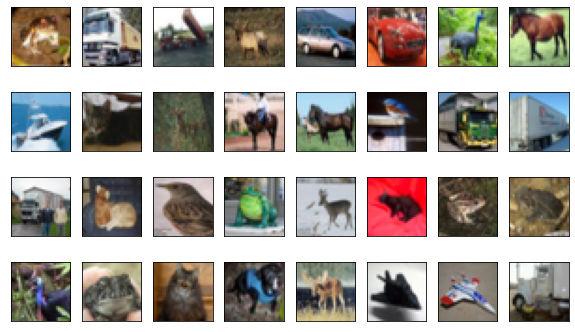

In [ ]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10,6))
for i in range(some_samples.shape[0]):
  ax = fig.add_subplot(4, 8, i + 1)
  ax.imshow(some_samples[i,...])
  plt.xticks([]), plt.yticks([])
plt.show()

# Создание модели CNN

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
                                    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

# Подготовка к обучению

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели

In [ ]:
NUM_EPOCHS = 20

In [ ]:
history = model.fit(train_x, train_y, epochs=NUM_EPOCHS, validation_data=(test_x, test_y))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3949 - accuracy: 0.5042 - val_loss: 1.1529 - val_accuracy: 0.5880
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0202 - accuracy: 0.6418 - val_loss: 0.9878 - val_accuracy: 0.6583
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8501 - accuracy: 0.7035 - val_loss: 0.9100 - val_accuracy: 0.6891
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7007 - accuracy: 0.7523 - val_loss: 0.9711 - val_accuracy: 0.6732
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5717 - accuracy: 0.7979 - val_loss: 0.9256 - val_accuracy: 0.7076
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4515 - accuracy: 0.8417 - val_loss: 1.0252 - val_accuracy: 0.6976
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3490 - accuracy: 0.8776 - val_loss: 1.2008 - val_accuracy:

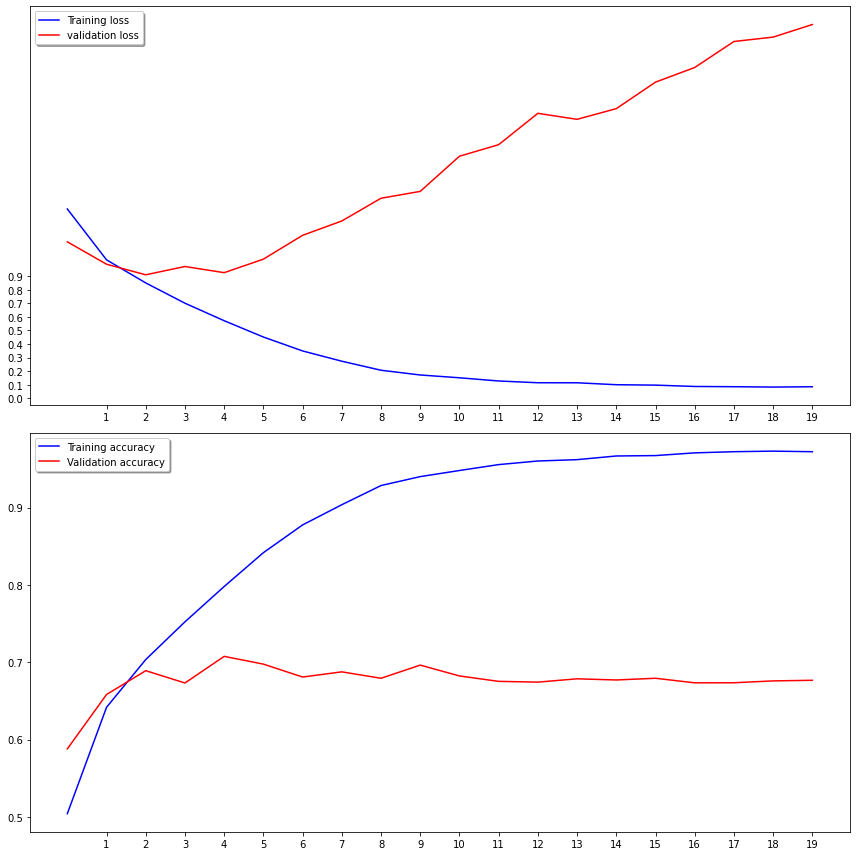

In [ ]:


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, NUM_EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
legend = ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, NUM_EPOCHS, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()



# Оценка качества модели

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 2.7538 - accuracy: 0.6767


[2.753840208053589, 0.6766999959945679]

# Отображение результата предсказания

In [ ]:
predictions = model.predict(test_x)

In [ ]:
def test_image(sample):
  prediction = model(sample[None, ...])[0]
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12, 4))

  ax = fig.add_subplot(1, 2, 1)
  ax.imshow(sample[...])
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1, 2, 2)
  bar_list = ax.bar(np.arange(10), prediction, align='center')
  bar_list[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)
  plt.show()

  print(f'Predicted class: {class_names[ans]}')

In [ ]:
import random

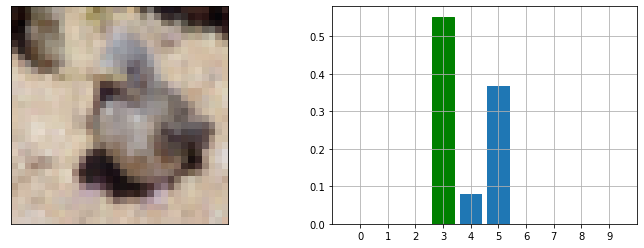

Predicted class: cat
True answer is bird


In [ ]:
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_image(sample)

print(f'True answer is {class_names[test_y[idx][0]]}')